In [197]:
# Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.cluster import DBSCAN,k_means
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge,RidgeCV
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV,KFold,ParameterGrid,train_test_split
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,euclidean_distances,euclidean_distances,f1_score
from sklearn.metrics import plot_roc_curve
from  sklearn.pipeline import Pipeline
from sklearn.svm import SVR,SVR
from sklearn.preprocessing import OneHotEncoder,power_transform,StandardScaler
from statsmodels.stats import anova,outliers_influence
import warnings
warnings.filterwarnings('ignore')

In [79]:
# loading the dataset
df=pd.read_csv(r'D:\Datatrained\Practice Project Data Trained\Avocado\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [80]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [81]:
# std is high for Averageprice and XLarge Bags
# min value is zero for XLarge Bags

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [83]:
#30 columns, 0 to 18248
#total 14 columns
# No missing value
# dtypes: float64(9), int64(2), object(3)

In [84]:
# Analyzing the each colum whether they are categorialor continueous
pd.set_option('display.max_columns',25)

In [85]:
df.apply(lambda x: sum(x.isnull()))

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [86]:
# No null values,Unnamed: 0  is not relevant feature

In [87]:
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [88]:
# Lets look on number of unique value for each of categorical variable
df.apply(lambda x: len(x.unique()))

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [89]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x] in['int64','object']]
categorical_columns = [x for x in categorical_columns if x in ['type','region','year','Date']]
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible Date
27-12-2015    108
24-12-2017    108
10-12-2017    108
03-12-2017    108
26-11-2017    108
             ... 
06-11-2016    108
07-01-2018    108
18-06-2017    107
25-06-2017    107
06-12-2015    107
Name: Date, Length: 169, dtype: int64

Frequency of Categories for varible type
conventional    9126
organic         9123
Name: type, dtype: int64

Frequency of Categories for varible year
2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

Frequency of Categories for varible region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle           

In [90]:
# Dropping insignificand variable

df=df.drop(columns=['Unnamed: 0'],axis=1)


In [91]:
#Dropping Categorical Variable
df_cnt=df.drop(columns=['type','region','year','Date'],axis=1)

In [92]:
df_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


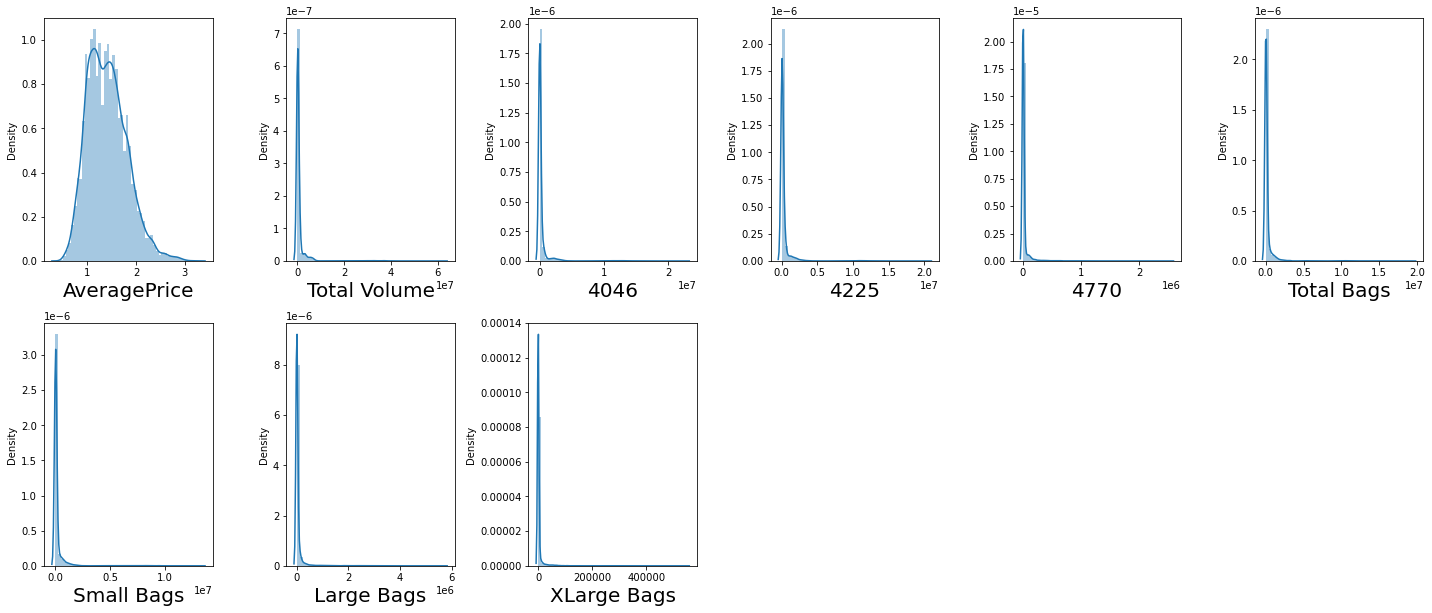

In [29]:
#EDA

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_cnt:
    if plotnumber<=32:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df_cnt[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout() 

In [30]:
# Left skewed data

#'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags'

#Right Skewed

#'AveragePrice'

In [93]:
df_cnt.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [94]:
#checking skewness
df_cnt.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [95]:
# Skewness
#Value>0.5 and < -0.5 are skewed 
# All continueous varials are skewed


In [96]:
x1=df[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]
x1.head()
x2=df['AveragePrice']
x2.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

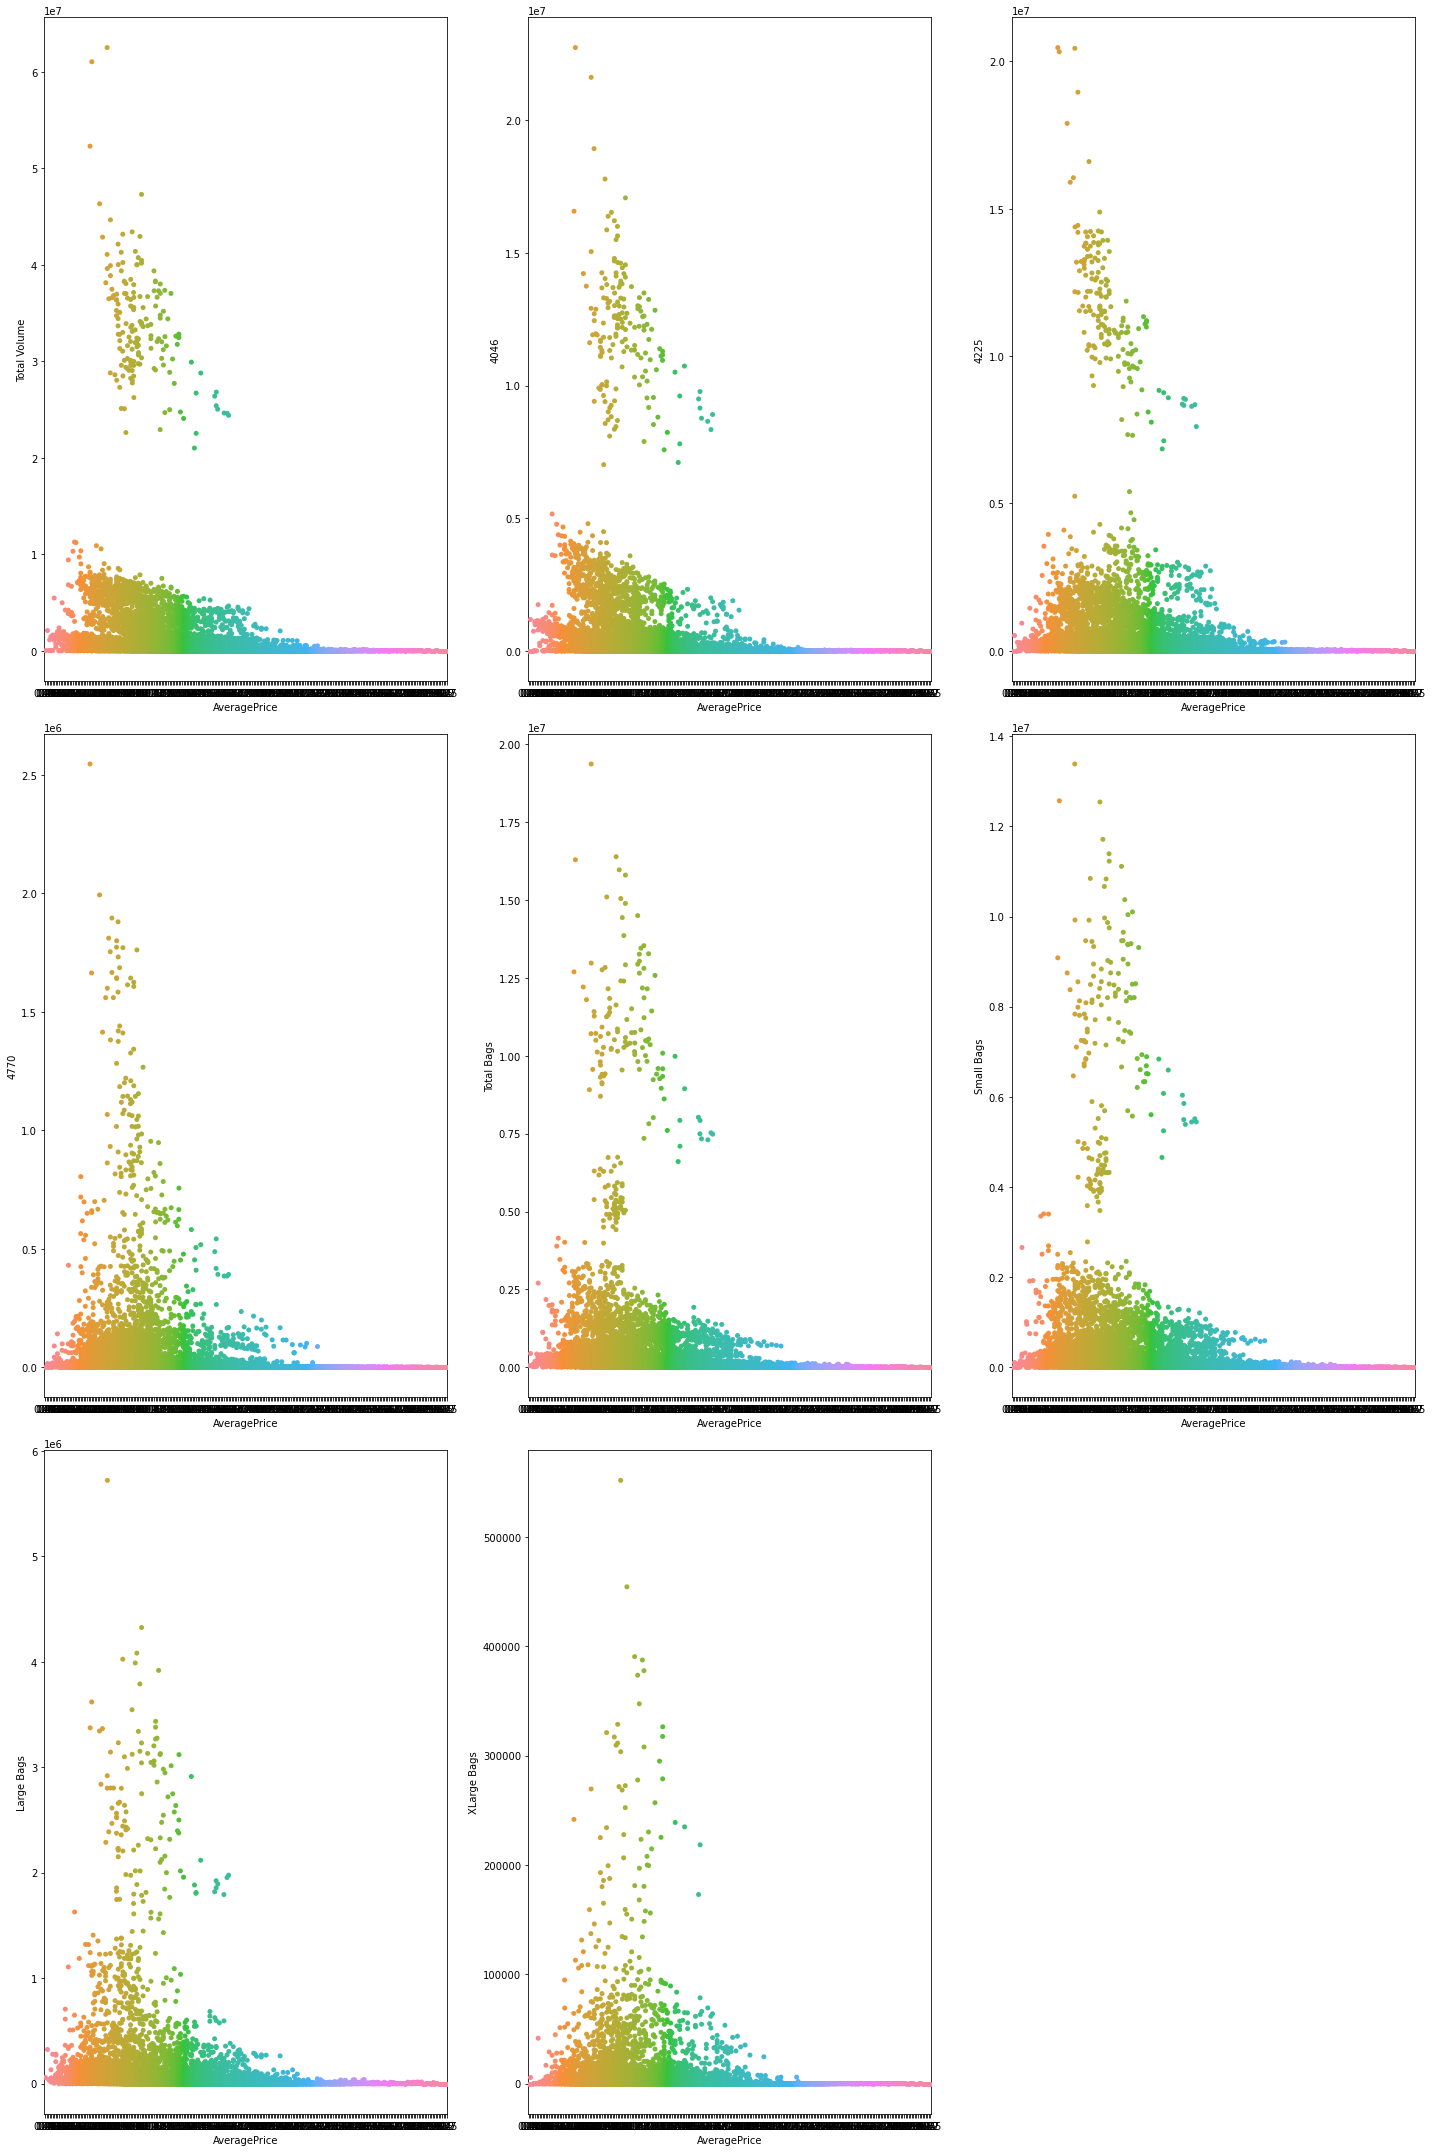

In [68]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x2,x1[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Each feature relation with the outcome is significant.Not dropping any variables based on the above analysis.

In [97]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x1)
df_new=pd.DataFrame(df_new,columns=x1.columns)

In [98]:
df_new.skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
dtype: float64

In [99]:
# skewness of XLarge Bags  need to removed

In [100]:
#Outlier Tretment

In [101]:
#Cocating the data again
x = pd.concat([df_new, x2], axis=1)
x.shape

(18249, 9)

In [102]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,AveragePrice
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,1.33
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,1.35
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0.93
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,1.08
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,1.28


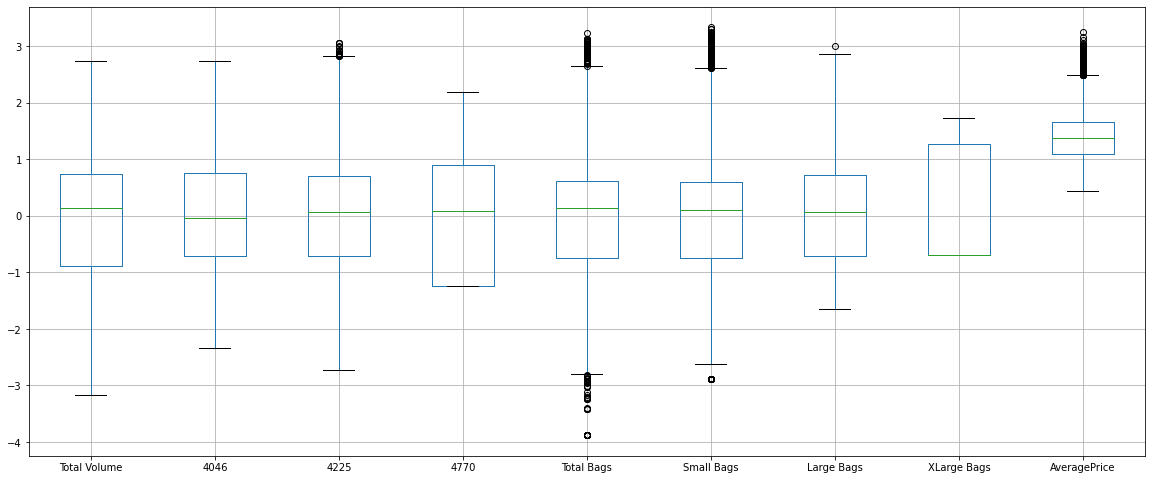

In [103]:
#Plotting Boxplot to understand outlier

x.boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.1)
plt.show()

In [104]:
x=x.rename(columns={'4225':'T_4225','4770':'T_4770','4046':'T_4046','Total Bags':'Total_Bags','Large Bags':'Large_Bags',
                    'Small Bags':'Small_Bags','XLarge Bags':'XLarge_Bags'})
x

,Total Volume,T_4046,T_4225,T_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,AveragePrice
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,1.33
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,1.35
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0.93
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,1.08
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,1.28
...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.63
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.71
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.87
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.93


In [105]:
x.columns

Index(['Total Volume', 'T_4046', 'T_4225', 'T_4770', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'AveragePrice'],
      dtype='object')

In [151]:
x=x.join(df_dummies)

In [152]:
# Quantile & iqr

In [153]:
q1=x.quantile(0.25)

#3rd quantile

q3=x.quantile(0.75)

# IQR

iqr=q3-q1

In [154]:
# Removing Outlier on higher side

In [155]:
index=np.where(x['T_4225']>(q3.T_4225 +(1.5*iqr.T_4225)))
x=x.drop(x.index[index])
x.reset_index()

,index,Total Volume,T_4046,T_4225,T_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,AveragePrice,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,1.33,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [156]:
index=np.where(x['Total_Bags']>(q3.Total_Bags +(1.5*iqr.Total_Bags)))
x=x.drop(x.index[index])
x.reset_index()

,index,Total Volume,T_4046,T_4225,T_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,AveragePrice,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,1.33,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [157]:
index=np.where(x['Small_Bags']>(q3.Small_Bags +(1.5*iqr.Small_Bags)))
x=x.drop(x.index[index])
x.reset_index()

,index,Total Volume,T_4046,T_4225,T_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,AveragePrice,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,1.33,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [158]:
index=np.where(x['Large_Bags']>(q3.Large_Bags +(1.5*iqr.Large_Bags)))
x=x.drop(x.index[index])
x.reset_index()

,index,Total Volume,T_4046,T_4225,T_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,AveragePrice,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,1.33,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [159]:
#Outlier tretment on lower side
#TotalBags,SmallBags

In [160]:
index=np.where(x['Total_Bags']<(q1.Total_Bags -(1.5*iqr.Total_Bags)))
x=x.drop(x.index[index])
x.reset_index()

,index,Total Volume,T_4046,T_4225,T_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,AveragePrice,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,1.33,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [161]:
index=np.where(x['Small_Bags']<(q1.Small_Bags -(1.5*iqr.Small_Bags)))
x=x.drop(x.index[index])
x.reset_index()

,index,Total Volume,T_4046,T_4225,T_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,AveragePrice,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,1.33,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [162]:
index=np.where(x['XLarge_Bags']<(q1.XLarge_Bags -(1.5*iqr.XLarge_Bags)))
x=x.drop(x.index[index])
x.reset_index()

,index,Total Volume,T_4046,T_4225,T_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,AveragePrice,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,1.33,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

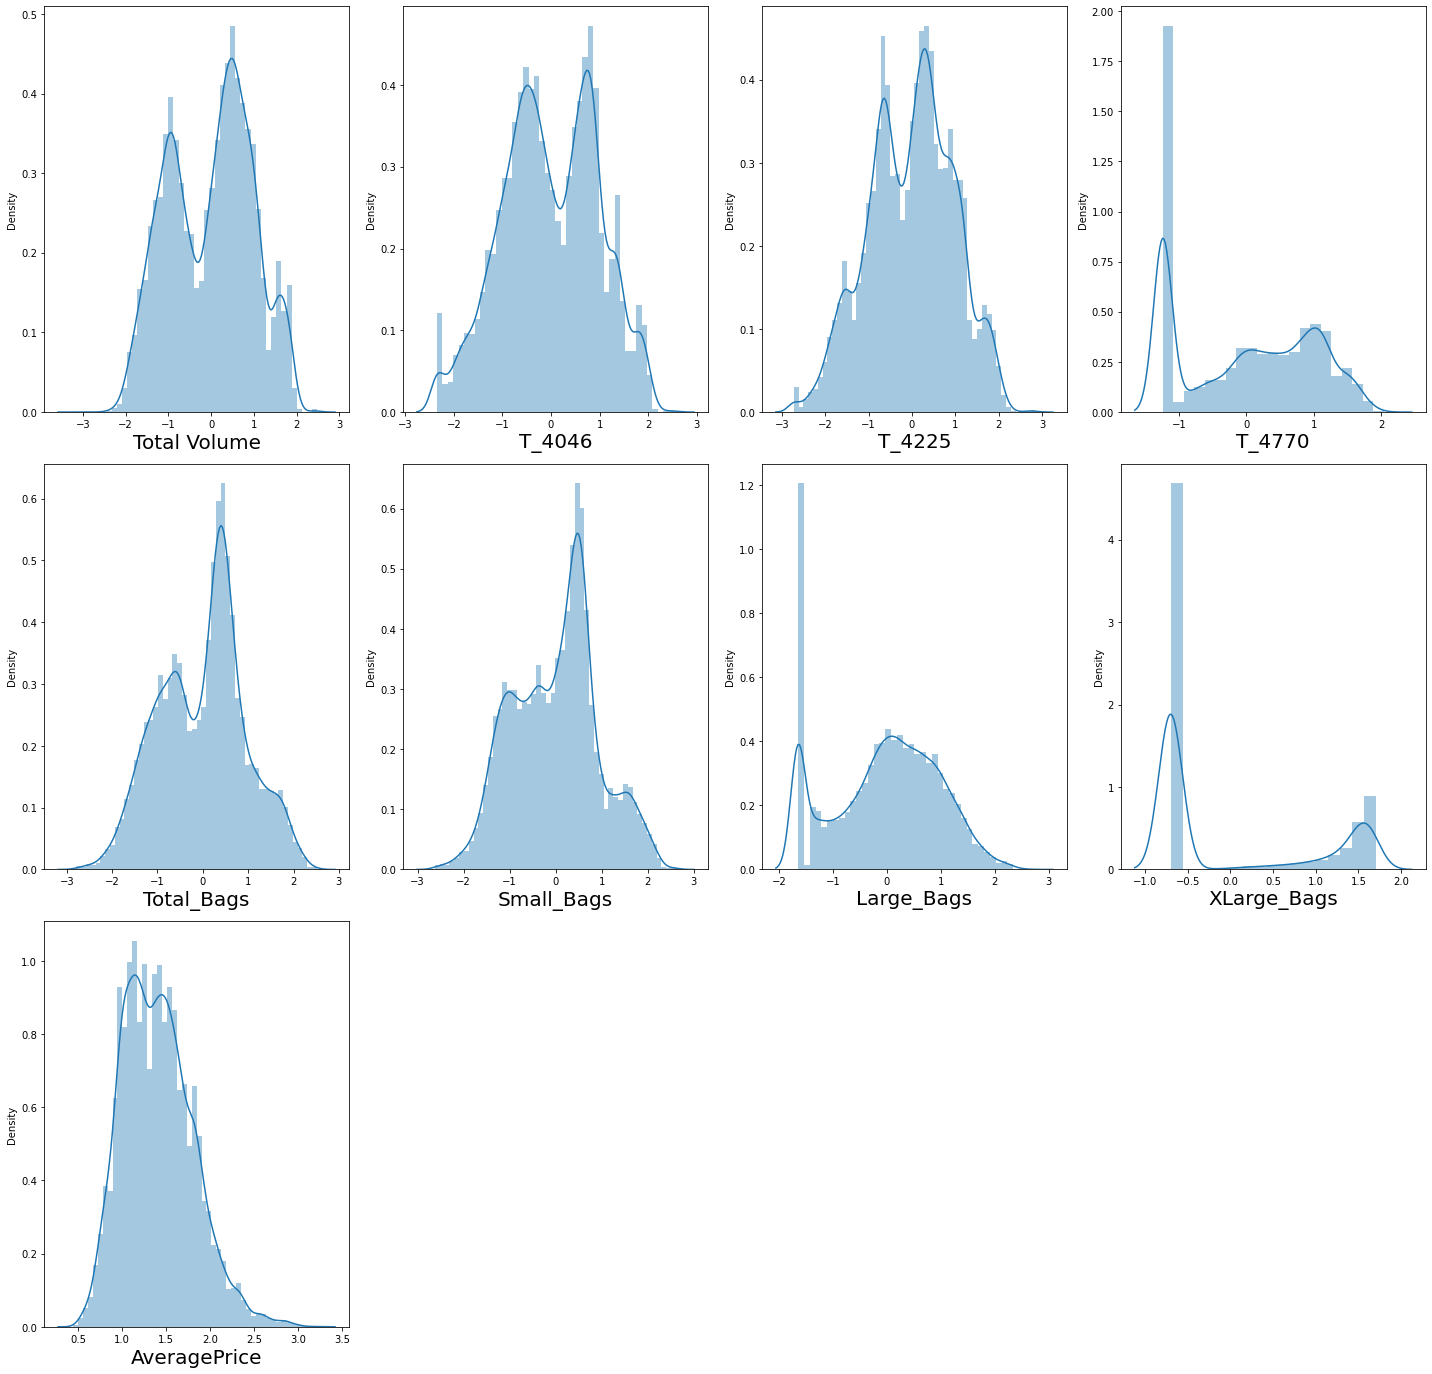

In [56]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout() 

In [57]:
#after outlier tretment,distribution graph looking better

In [58]:
# Encoding categorical columns using get_dummies
# drop_first=True will reduce dimention.

In [163]:
x.columns

Index(['Total Volume', 'T_4046', 'T_4225', 'T_4770', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'AveragePrice', 'year',
       ...
       'region_SouthCarolina', 'region_SouthCentral', 'region_Southeast',
       'region_Spokane', 'region_StLouis', 'region_Syracuse', 'region_Tampa',
       'region_TotalUS', 'region_West', 'region_WestTexNewMexico'],
      dtype='object', length=235)

In [164]:
x_over_1=x.drop(columns=['AveragePrice'],axis=1)
y_over=x['AveragePrice']


In [166]:
x_over_1.head()

,Total Volume,T_4046,T_4225,T_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [179]:
x3=x_over_1[['Total Volume', 'T_4046', 'T_4225', 'T_4770', 'Total_Bags','Small_Bags', 'Large_Bags', 'XLarge_Bags']]
x3.head()
x4=x_over_1.drop(columns=['Total Volume', 'T_4046', 'T_4225', 'T_4770', 'Total_Bags','Small_Bags', 'Large_Bags', 'XLarge_Bags'],axis=1)
x4.head()

,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [175]:
categorical_columns

['Date', 'type', 'year', 'region']

In [119]:
# Analyzing the each colum whether they are categorialor continueous
pd.set_option('display.max_columns',256)
df_dummies=pd.get_dummies(df[categorical_columns],drop_first=False)
df_dummies.head()

,year,Date_01-01-2017,Date_01-02-2015,Date_01-03-2015,Date_01-05-2016,Date_01-10-2017,Date_01-11-2015,Date_02-04-2017,Date_02-07-2017,Date_02-08-2015,Date_02-10-2016,Date_03-01-2016,Date_03-04-2016,Date_03-05-2015,Date_03-07-2016,Date_03-09-2017,Date_03-12-2017,Date_04-01-2015,Date_04-02-2018,Date_04-03-2018,Date_04-06-2017,Date_04-09-2016,Date_04-10-2015,Date_04-12-2016,Date_05-02-2017,Date_05-03-2017,Date_05-04-2015,Date_05-06-2016,Date_05-07-2015,Date_05-11-2017,Date_06-03-2016,Date_06-08-2017,Date_06-09-2015,Date_06-11-2016,Date_06-12-2015,Date_07-01-2018,Date_07-02-2016,Date_07-05-2017,Date_07-06-2015,Date_07-08-2016,Date_08-01-2017,Date_08-02-2015,Date_08-03-2015,Date_08-05-2016,Date_08-10-2017,Date_08-11-2015,Date_09-04-2017,Date_09-07-2017,Date_09-08-2015,Date_09-10-2016,Date_10-01-2016,Date_10-04-2016,Date_10-05-2015,Date_10-07-2016,Date_10-09-2017,Date_10-12-2017,Date_11-01-2015,Date_11-02-2018,Date_11-03-2018,Date_11-06-2017,Date_11-09-2016,Date_11-10-2015,Date_11-12-2016,Date_12-02-2017,Date_12-03-2017,Date_12-04-2015,Date_12-06-2016,Date_12-07-2015,Date_12-11-2017,Date_13-03-2016,Date_13-08-2017,Date_13-09-2015,Date_13-11-2016,Date_13-12-2015,Date_14-01-2018,Date_14-02-2016,Date_14-05-2017,Date_14-06-2015,Date_14-08-2016,Date_15-01-2017,Date_15-02-2015,Date_15-03-2015,Date_15-05-2016,Date_15-10-2017,Date_15-11-2015,Date_16-04-2017,Date_16-07-2017,Date_16-08-2015,Date_16-10-2016,Date_17-01-2016,Date_17-04-2016,Date_17-05-2015,Date_17-07-2016,Date_17-09-2017,Date_17-12-2017,Date_18-01-2015,Date_18-02-2018,Date_18-03-2018,Date_18-06-2017,Date_18-09-2016,Date_18-10-2015,Date_18-12-2016,Date_19-02-2017,Date_19-03-2017,Date_19-04-2015,Date_19-06-2016,Date_19-07-2015,Date_19-11-2017,Date_20-03-2016,Date_20-08-2017,Date_20-09-2015,Date_20-11-2016,Date_20-12-2015,Date_21-01-2018,Date_21-02-2016,Date_21-05-2017,Date_21-06-2015,Date_21-08-2016,Date_22-01-2017,Date_22-02-2015,Date_22-03-2015,Date_22-05-2016,Date_22-10-2017,Date_22-11-2015,Date_23-04-2017,Date_23-07-2017,Date_23-08-2015,Date_23-10-2016,Date_24-01-2016,Date_24-04-2016,Date_24-05-2015,Date_24-07-2016,Date_24-09-2017,Date_24-12-2017,Date_25-01-2015,Date_25-02-2018,Date_25-03-2018,Date_25-06-2017,Date_25-09-2016,Date_25-10-2015,Date_25-12-2016,Date_26-02-2017,Date_26-03-2017,Date_26-04-2015,Date_26-06-2016,Date_26-07-2015,Date_26-11-2017,Date_27-03-2016,Date_27-08-2017,Date_27-09-2015,Date_27-11-2016,Date_27-12-2015,Date_28-01-2018,Date_28-02-2016,Date_28-05-2017,Date_28-06-2015,Date_28-08-2016,Date_29-01-2017,Date_29-03-2015,Date_29-05-2016,Date_29-10-2017,Date_29-11-2015,Date_30-04-2017,Date_30-07-2017,Date_30-08-2015,Date_30-10-2016,Date_31-01-2016,Date_31-05-2015,Date_31-07-2016,Date_31-12-2017,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [167]:
# dimention of df_dummies dataset
df_dummies.shape

# (rows=18249,columns=226)

(18249, 226)

In [168]:
#Joining the categotrical and countinueous features
#x=df_cnt.join(df_dummies)

In [169]:
x_over_1.columns

Index(['Total Volume', 'T_4046', 'T_4225', 'T_4770', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'year', 'Date_01-01-2017',
       ...
       'region_SouthCarolina', 'region_SouthCentral', 'region_Southeast',
       'region_Spokane', 'region_StLouis', 'region_Syracuse', 'region_Tampa',
       'region_TotalUS', 'region_West', 'region_WestTexNewMexico'],
      dtype='object', length=234)

In [170]:
# Multivariate Analysis
# checking correlation

corr_mat=df.corr() 
corr_mat

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


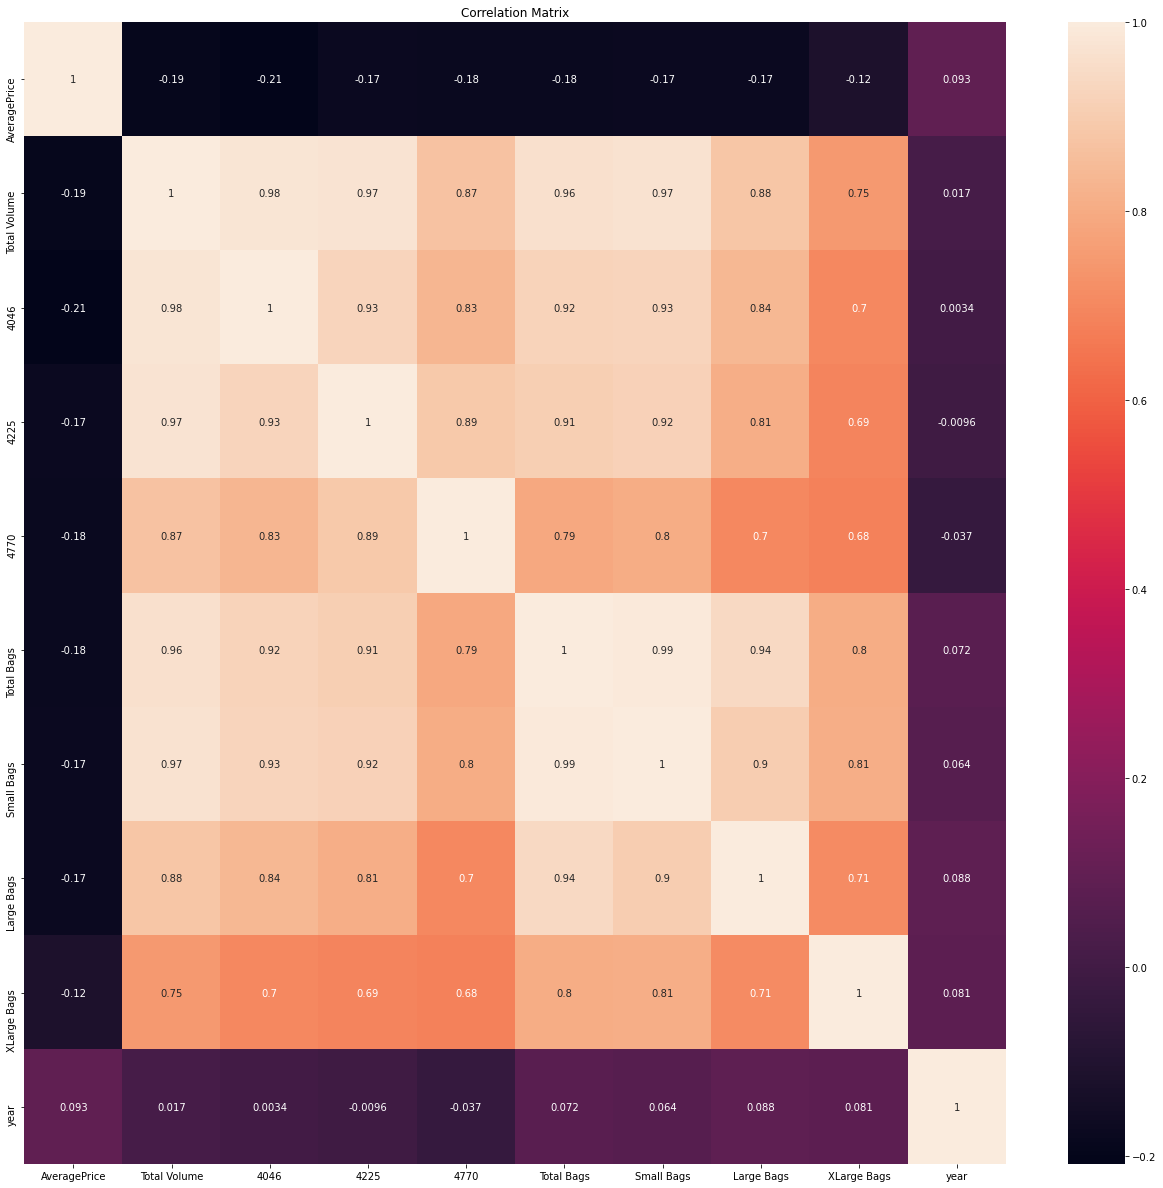

In [171]:
plt.figure(figsize= [22,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [123]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [124]:
#columns_to_scale  = ['R','H','AB','HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA' ]
scaler = StandardScaler()

In [176]:
scaled_columns  = scaler.fit_transform(x3)

In [177]:
scaled_columns.shape

(17891, 8)

In [150]:
df_dummies.shape

(18249, 226)

In [180]:
# Concatenate (Column-Bind) Processed Columns Back Together
x_over = np.concatenate([scaled_columns, x4], axis=1)

In [202]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    #acc=LR.score(x_test,y_test)
    r2_sc=r2_score(y_test,predrf)
    if r2_sc>maxAccu:
        maxAccu=r2_sc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.7965806749975192 on Random_state 1


In [ ]:
#Best accuracy is 0.7965806749975192 on Random_state 1

In [209]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
r2_sc=r2_score(y_test,predrf)
r2_sc


0.7827877041832717

In [267]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))

MAE: 0.10372680700447094
MSE: 0.021631032602459015
RMSE: 0.1470749217319493


In [213]:
from sklearn.neighbors import KNeighborsRegressor
KN=KNeighborsRegressor()
KN.fit(x_train,y_train)
predKN=KN.predict(x_test)
r2_sc=r2_score(y_test,predKN)
r2_sc

0.8533571285289537

In [268]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predKN))
print('MSE:', metrics.mean_squared_error(y_test, predKN))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predKN)))

MAE: 0.1082064083457526
MSE: 0.023245867362146053
RMSE: 0.15246595476415728


In [214]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
r2_sc=r2_score(y_test,preddt)
r2_sc

0.7153484258795824

In [269]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))

MAE: 0.13967399403874814
MSE: 0.04512304396423249
RMSE: 0.21242185378212028


In [216]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
predada=dt.predict(x_test)
r2_sc=r2_score(y_test,predada)
r2_sc

0.7153484258795824

In [272]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predada))
print('MSE:', metrics.mean_squared_error(y_test, predada))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predada)))

MAE: 0.13967399403874814
MSE: 0.04512304396423249
RMSE: 0.21242185378212028


In [218]:
from sklearn.ensemble import GradientBoostingRegressor
Gbt=GradientBoostingRegressor()
Gbt.fit(x_train,y_train)
predGbt=dt.predict(x_test)
r2_sc=r2_score(y_test,predGbt)
r2_sc

0.7153484258795824

In [271]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predGbt))
print('MSE:', metrics.mean_squared_error(y_test, predGbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predGbt)))

MAE: 0.13967399403874814
MSE: 0.04512304396423249
RMSE: 0.21242185378212028


In [227]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2_sc=r2_score(y_test,predrf)
r2_sc

0.8635440577763166

In [270]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))

MAE: 0.10372680700447094
MSE: 0.021631032602459015
RMSE: 0.1470749217319493


In [ ]:
# Hyperparameter tuning...

In [274]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [275]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.29699102491504925 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.2915028364400302 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
0.2711608802788378 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.2672297215888884 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.18772662766822823 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.17795768422585856 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.16845582558672997 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.16085676302581828 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.1710713201438456 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.16199498416272107 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.1669268212495334 {'bootstrap': Tru

In [276]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=10, n_estimators=25)

In [277]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 100.0 %


In [280]:
from sklearn.metrics import mean_squared_error
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.0


In [ ]:
# Checking overfitting problem 


In [254]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [255]:
lassCV= LassoCV(alphas=None,max_iter=1000,normalize=True)
lassCV.fit(x_train,y_train)

LassoCV(normalize=True)

In [256]:
# best Alpha parameter (Alpha = learning rate)
alpha =lassCV.alpha_
alpha

2.2161909441171703e-06

In [257]:
# now that we have best parameter,lets use lasso regression and see how well our data ftted befor
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.2161909441171703e-06)

In [258]:
lasso_reg.score(x_test,y_test)

0.7833638743580404

In [221]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x_over,y_over,cv=5)
print("Cross Validation Score fo Decesion Tree :",scr.mean())

Cross Validation Score fo Decesion Tree : -0.14694456460817448


In [222]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(KN,x_over,y_over,cv=5)
print("Cross Validation Score fo KNN :",scr.mean())

Cross Validation Score fo KNN : 0.29873414803650816


In [224]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(ada,x_over,y_over,cv=5)
print("Cross Validation Score fo ADA :",scr.mean())

Cross Validation Score fo ADA : 0.3835438390028811


In [226]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(Gbt,x_over,y_over,cv=5)
print("Cross Validation Score fo Gbt :",scr.mean())

Cross Validation Score fo ADA : 0.38342537210194144


In [228]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x_over,y_over,cv=5)
print("Cross Validation Score fo rf :",scr.mean())

Cross Validation Score fo rf : 0.3433145478909249


In [ ]:
#Model Accuracy  based on Cross Validation

In [ ]:
      Model Accuracy      Cross Validation Score      Diff
LR     78                         78                  0
KN     85                         29                  46
DT     71                        -14                  85
Ada    71                         38                  33
Gbt    71                         38                  33
rf     86                         34                  52


Since diff is 6 with high model accuracy for LR,It is the best model 

In [ ]:
import pickle

# writing diffrent model files to file

with open('modelForPrediction.sav','LR') as f:
    pickle.dump(rf,f)
    
with open ('SandardScalar.sav','LR') as f:
    pickle.dump(scalar,f)